COLOUR SELECTION
* Adjusting colour of the image according to threshold to highlight the important features of the image
* Selecting pixels which fall below/above the threshold and tuning them to our requirement

In [1]:
from matplotlib import pyplot as plt
from matplotlib import image as img
import numpy as np

In [2]:
path = '/home/vanessa/ML/LaneDetection/self-driving-car-master/project_1_lane_finding_basic/data/test_images'

In [3]:
image = img.imread('solidWhiteCurve.jpg')
print(type(image))
print(image.shape)

<class 'numpy.ndarray'>
(540, 960, 3)


In [4]:
ysize = image.shape[0]
xsize = image.shape[1]

In [5]:
#making a copy of the image due to pass by reference
colour_select = np.copy(image)

In [6]:
#threshold values
red_threshold = 190
blue_threshold = 190
green_threshold = 190 
rgb_threshold = [red_threshold, blue_threshold, green_threshold]

In [7]:
colour_thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
colour_select[colour_thresholds] = [0,0,0]

In [8]:
#thresholds = (image[:,:,0] > rgb_threshold[0]) | (image[:,:,1] > rgb_threshold[1]) | (image[:,:,2] > rgb_threshold[2])
#image_copy[thresholds] = [255,255,255]

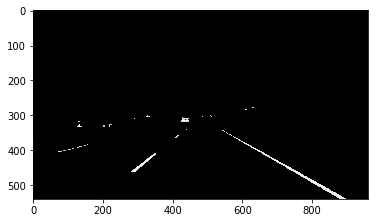

In [9]:
plt.imshow(colour_select)
plt.show()

REGION MASKING
* The whole figure might not be important, so trying to select a part of the figure that is important
* Using polyfit to minimise the squaring error between x1, x2 and y1, y2 of a line


In [10]:
line_image = np.copy(image)

In [11]:
left_bottom = [0, ysize]
right_bottom = [xsize, ysize]
apex = [xsize/2, 0]

In [12]:
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)


In [13]:
#XX, YY = np.meshgrid(np.arange(0, ysize), np.arange(0, xsize))
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
#XX, YY array of indices
print(YY)

[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [537 537 537 ... 537 537 537]
 [538 538 538 ... 538 538 538]
 [539 539 539 ... 539 539 539]]


In [14]:
region_thresholds = (YY > (XX*fit_left[0]+fit_left[1]))& \
                    (YY > (XX*fit_right[0]+fit_right[1]))& \
                    (YY < (XX*fit_bottom[0]+fit_bottom[1]))

In [15]:
line_image[region_thresholds]=[255,0,0]

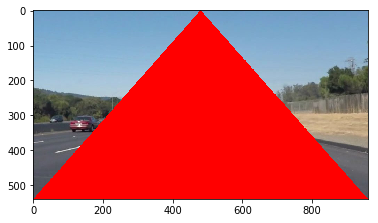

In [16]:
plt.imshow(line_image)
plt.show()

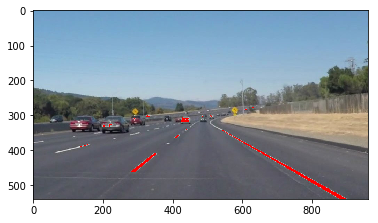

In [17]:
colourRegion_image = np.copy(image)
colourRegion_image[~colour_thresholds&region_thresholds]=[255, 0, 0]
plt.imshow(colourRegion_image)
plt.show()

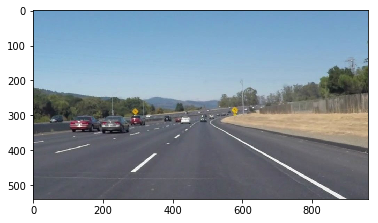

In [18]:
plt.imshow(image)
plt.show()